     Hardness        Solids  Chloramines     Sulfate  Organic_carbon  \
0  204.890455  20791.318981     7.300212  368.516441       10.379783   
1  129.422921  18630.057858     6.635246  333.073546       15.180013   
2  224.236259  19909.541732     9.275884  333.073546       16.868637   
3  214.373394  22018.417441     8.059332  356.886136       18.436524   
4  181.101509  17978.986339     6.546600  310.135738       11.558279   

   Chloramine_Sulfate_ratio  Organic_Trihalo_ratio  log_Solids  ph_squared  \
0                  0.019810               0.119320    9.942339   49.515880   
1                  0.019921               0.269488    9.832585   13.809251   
2                  0.027849               0.253969    9.899005   65.595813   
3                  0.022582               0.183737    9.999680   69.168595   
4                  0.021109               0.361219    9.797015   82.668527   

   Solids_bins  Potability  
0          1.0           0  
1          1.0           0  
2          

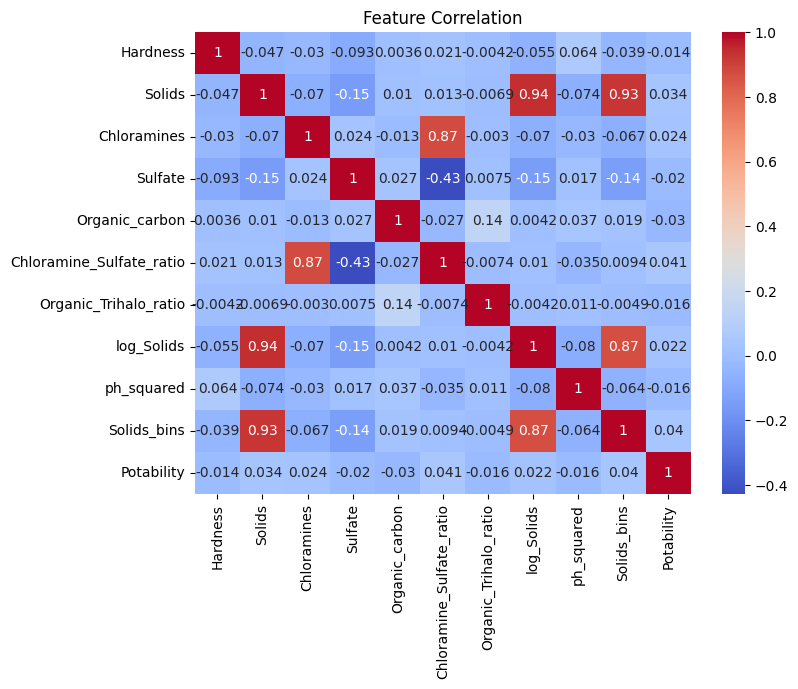

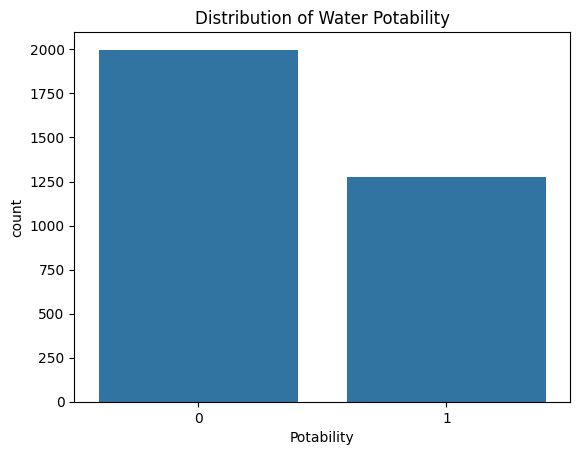

Accuracy: 0.6661585365853658
[[344  68]
 [151  93]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.76       412
           1       0.58      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.64      0.61      0.61       656
weighted avg       0.65      0.67      0.65       656

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Accuracy: 0.6753048780487805
[[350  62]
 [151  93]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.66      0.68      0.65       656



In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Read and understand the data
df = pd.read_csv('C:/Users/nigus/Desktop/AI-Group-3/Data/water_quality.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 3. Data visualization and EDA
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

sns.countplot(x='Potability', data=df)
plt.title('Distribution of Water Potability')
plt.show()

# 4. Feature Engineering (Handling Missing Values)
df.fillna(df.median(), inplace=True)

# Split features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model building
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 6. Model evaluation
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7. Model Optimization (Hyperparameter Tuning)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# 8. Model Re-evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
